# SONAR Rock vs Mine Prediction 
___
By: Hossam Farhoud

# **Importing Libraries**
here we are importingLibrariesy needed

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# **Loading the Dataset**

In [17]:
data = pd.read_csv('/kaggle/input/sonar-data/Copy of sonar data.csv', header=None)  # Load the sonar dataset
data  # Display the dataset

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


## **Exploring the dataset**

In [18]:
print("\nDataset Info:")
data.info()  # Print dataset information


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    

## **Checking for missing values**

In [19]:
print("\nNull Values in the Dataset:")
print(data.isna().sum())  # Check for missing values


Null Values in the Dataset:
0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64


In [20]:
Data_Nulls=dict(data.isna().sum())
Data_Nulls

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0}

# Analyze the distribution of the target column

In [21]:
print(data[60].value_counts())  # Check the counts for Rock (R) and Mine (M)

60
M    111
R     97
Name: count, dtype: int64


# Replace categorical target values (R -> 0, M -> 1)

In [28]:
data[60] = data[60].replace({'R': 0, 'M': 1})
data[60] = data[60].infer_objects(copy=False)
print(data[60].value_counts())

60
1    111
0     97
Name: count, dtype: int64


In [23]:
data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
0,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024
1,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930


# **Separating features and target variable**

In [24]:
X = data.drop(columns=60, axis=1)  # Features
y = data[60]  # Target variable

# Splitting data into train and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44, shuffle=True)

# Check train-test split shapes

In [26]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (187, 60)
X_test shape: (21, 60)
y_train shape: (187,)
y_test shape: (21,)


# **Defining Models** 
* To choose the best model based on the results 

In [27]:
GaussianNBModel = GaussianNB()
MultinomialNBModel = MultinomialNB(alpha=1.0)
BernoulliNBModel = BernoulliNB(alpha=1.0, binarize=1)
LogisticRegressionModel = LogisticRegression(penalty='l2', solver='sag', C=1.0, random_state=33)
SGDClassifierModel = SGDClassifier(penalty='l2', loss='squared_error', learning_rate='optimal', random_state=33)
RandomForestClassifierModel = RandomForestClassifier(criterion='gini', n_estimators=300, max_depth=7, random_state=33)
GBCModel = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=33)
QDAModel = QuadraticDiscriminantAnalysis(tol=0.0001)
SVCModel = SVC(kernel='rbf', max_iter=100, C=1.0, gamma='auto')
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=33)
KNNClassifierModel = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')

Models = [
    GaussianNBModel, MultinomialNBModel, BernoulliNBModel, LogisticRegressionModel,
    SGDClassifierModel, RandomForestClassifierModel, GBCModel, QDAModel,
    SVCModel, DecisionTreeClassifierModel, KNNClassifierModel
]

# **Evaluating Models**

In [30]:
ModelsScore = {}
for Model in Models:
    print(f'\nFor Model: {Model.__class__.__name__}')
    Model.fit(X_train, y_train)  # Train the model
    print(f'Train Score: {Model.score(X_train, y_train)}')
    print(f'Test Score: {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)  # Make predictions
    ClassificationReport = classification_report(y_test, y_pred, zero_division=0)  # Generate classification report with zero_division
    print('Classification Report:\n', ClassificationReport)
    print('=================================================')



For Model: GaussianNB
Train Score: 0.732620320855615
Test Score: 0.7619047619047619
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.90      0.69      0.78        13

    accuracy                           0.76        21
   macro avg       0.77      0.78      0.76        21
weighted avg       0.80      0.76      0.77        21


For Model: MultinomialNB
Train Score: 0.7754010695187166
Test Score: 0.7619047619047619
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.75      0.92      0.83        13

    accuracy                           0.76        21
   macro avg       0.78      0.71      0.72        21
weighted avg       0.77      0.76      0.75        21


For Model: BernoulliNB
Train Score: 0.5240641711229946
Test Score: 0.6190476190476191
Classification Report:
              

*   Based on the result, applying RandomForestClassifier model is the best
choice here 

# **Applying RandomForestClassifier Model**

In [31]:
RandomForestClassifierModel = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=2, random_state=33)
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=33)

# Calculating Prediction and Performance Metrics

In [ ]:
print('RandomForestClassifierModel Train Score:', RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score:', RandomForestClassifierModel.score(X_test, y_test))

# Compute Predictions

In [32]:
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)

# **Metrics**

In [33]:
print('Precision Score:', precision_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Precision Score: 0.8125
Recall Score: 1.0
Accuracy Score: 0.8571428571428571
F1 Score: 0.896551724137931


# **Plotting the ROC Curve**

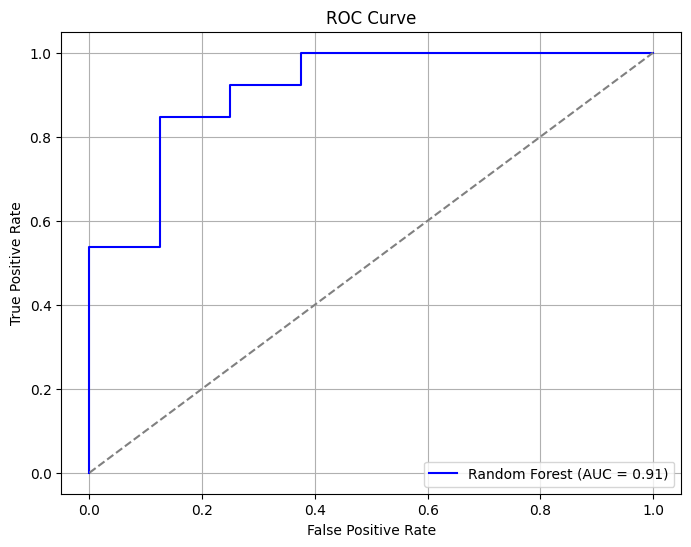

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
auc = roc_auc_score(y_test, y_pred_prob[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Predicting the classification of a single input data instance using the Random Forest model

In [39]:
# Input data representing feature values for a single instance
input_data = (0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = RandomForestClassifierModel.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

[1]
The object is a mine


* Correct Prediction 

# Import and display the confusion matrix for the Random Forest model
*  This helps visualize the performance of the model by comparing predicted vs. actual labels

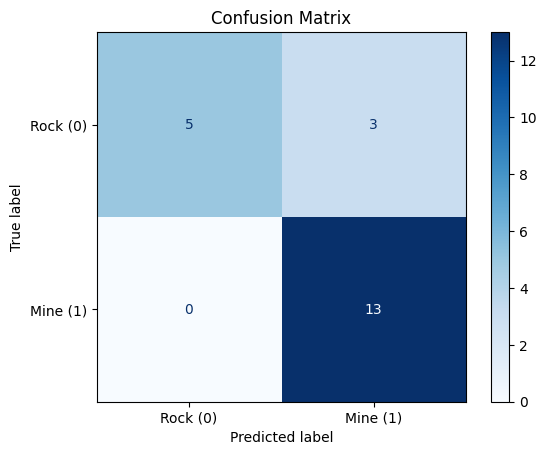

In [41]:
# Display the confusion matrix for the trained Random Forest model
ConfusionMatrixDisplay.from_estimator(
    RandomForestClassifierModel,  # Trained Random Forest model
    X_test,  # Test features
    y_test,  # True labels
    cmap='Blues',  # Colormap for better visualization
    display_labels=['Rock (0)', 'Mine (1)']  # Class labels for better interpretability
)
plt.title('Confusion Matrix')  # Add a title to the plot
plt.show()  # Render the plot


Perfect Recall for Mines:
*   The model correctly identified all Mines (1) with no false negatives.

False Positives
*   The model misclassified 3 Rocks (0) as Mines (1).

1.   True Positives (TP): 13

*   Mines (1) correctly predicted as Mines (1).

2.   True Negatives (TN): 5

*   Rocks (0) correctly predicted as Rocks (0).

3.   False Positives (FP): 3

*   Rocks (0) incorrectly predicted as Mines (1).

3.   False Negatives (FN): 0

*   Mines (1) incorrectly predicted as Rocks (0).

# **Feature Importance**

In [38]:
feature_importances = RandomForestClassifierModel.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': range(len(feature_importances)),
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
# Print and Plot Feature Importance
print("Feature Importance:\n", feature_importance_df)

Feature Importance:
     Feature  Importance
10       10    0.122664
11       11    0.092901
48       48    0.079697
12       12    0.057304
9         9    0.049278
45       45    0.042673
47       47    0.041659
8         8    0.040020
44       44    0.033444
51       51    0.030179
46       46    0.029336
35       35    0.027941
20       20    0.024363
43       43    0.024319
19       19    0.023752
50       50    0.021904
36       36    0.020511
49       49    0.020123
15       15    0.017156
27       27    0.016726
42       42    0.016568
53       53    0.014622
4         4    0.011230
29       29    0.010449
3         3    0.009611
21       21    0.008868
24       24    0.007884
38       38    0.007623
22       22    0.007061
17       17    0.006674
13       13    0.005710
26       26    0.005602
16       16    0.005428
5         5    0.005359
1         1    0.005257
28       28    0.004736
32       32    0.004559
18       18    0.004415
14       14    0.004242
52       52    0.00

# Plot Feature Importance

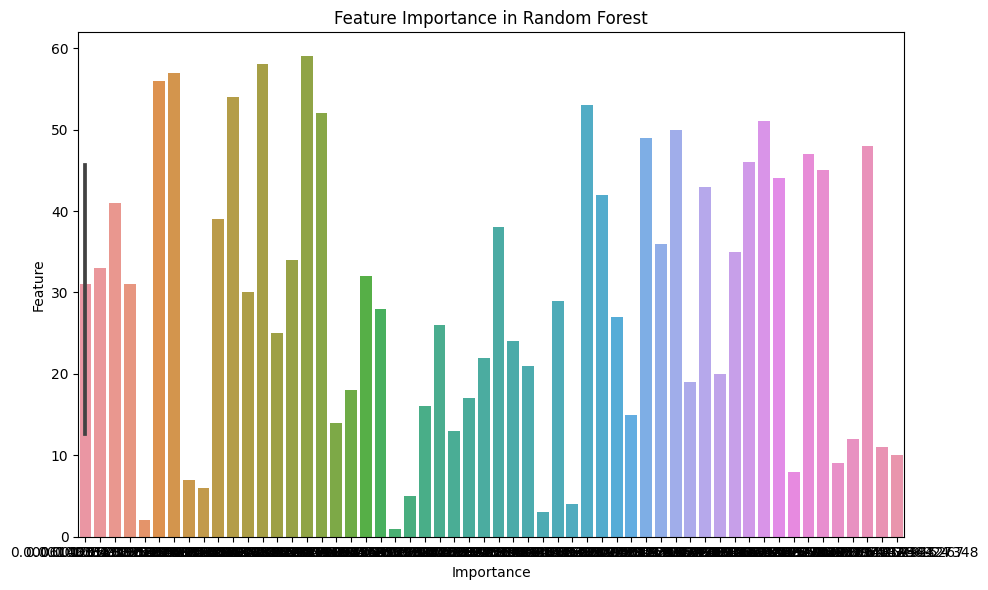

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# **Saving Feature Importance to File**

In [42]:
output_file = "feature_importance.txt"
with open(output_file, "w") as file:
    file.write("Feature Importance:\n")
    for index, row in feature_importance_df.iterrows():
        file.write(f"{row['Feature']}: {row['Importance']:.4f}\n")
print(f"Feature importance saved to {output_file}")

Feature importance saved to feature_importance.txt


# **GridSearch for Hyperparameter Tuning**

In [43]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples at a leaf node
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=33)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:\n", grid_search.best_params_)

# Train a new Random Forest with the best parameters
best_rf = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_best = best_rf.predict(X_test)
best_f1_score = f1_score(y_test, y_pred_best)
print("F1 Score with Tuned Hyperparameters:", best_f1_score)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total

# **Evaluate Best Model**

In [44]:
y_pred_best = best_rf.predict(X_test)
print("F1 Score with Best Parameters:", f1_score(y_test, y_pred_best))

F1 Score with Best Parameters: 0.8666666666666666


# **Saving Comparison Results**

In [46]:
with open("model_comparison_results.txt", "w") as file:
    file.write("Comparison results saved.")

# Load the feature importance from the file (already provided)

In [47]:
top_features_indices = [10, 11, 48, 12, 9, 45, 47, 8, 44, 51]  # Adjust the number of features as needed

# Retain only the top features

In [48]:
X_train_top = X_train.iloc[:, top_features_indices]
X_test_top = X_test.iloc[:, top_features_indices]

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=10,

# Retrain the Random Forest with the best parameters

In [49]:
best_rf = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=33
)
best_rf.fit(X_train_top, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2, random_state=33)

# Predict and evaluate the model

In [50]:
y_pred_top = best_rf.predict(X_test_top)

# Metrics

In [51]:
accuracy = accuracy_score(y_test, y_pred_top)
precision = precision_score(y_test, y_pred_top)
recall = recall_score(y_test, y_pred_top)
f1 = f1_score(y_test, y_pred_top)

print("Performance with Top Features and Best Parameters:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Performance with Top Features and Best Parameters:
Accuracy: 0.7619
Precision: 0.7857
Recall: 0.8462
F1 Score: 0.8148


# Final Recommendation:

If you’re optimizing for accuracy and prediction quality, stick with All Features. However, keep the top-feature model as a backup if you need to scale or deploy on resource-constrained environments.